# DATA SCIENCE for DESIGN
ASSIGNMENT 2- PROJECT DATA ANALYSIS,
LOCAL PEACE AGREEMENT  
> SHIN-YI, HUANG 


> ID# S2070717



# Overview


Firstly, I will briefly introduce the dataset, PA-X Local peace agreement, which I received from my data provider, Christine Bell. This database lists all agreements that are collected from 1990 to 2019 globally and was released over the course of early 2020. It has contained local negotiation practices including of wider confliction, or of local/communal violent conflict. Overall, there are five regions in which the conflict addressed by the agreement is taking place listed as: *Middle East and North Africa*, *Africa (exl. MENA)*,  *Asia and Pacific*, *Europe and Eurasia* and *Cross- regional*. In more detail, one of the countries, Syria which belongs to region *Middle East and North Africa* appears to have the most conflicts in the agreement with 75 times mentioned in the dataset, while conflict occurs the least amount is region, *Cross- regional*, as only one case recorded by the local peace agreement. In my report, I am concentrating on analysing the relationships with the variable RitPray (ritual/prayer) and other variables (participant actors) with several visualizations provided.

---

Its data is formatted as a tabular type which contains 286 rows and 55 columns. The columns in this dataset covers from raw strings, integers, time to binary data type with each represents with their own definitions. For example, the columns I analysed including: “**Con**: Country/Entity”, ”**Dat**: Date Signed”, “**Reg**: Region”, “**LocState**: Participant- Local state actor”, “**LocArmedGr**: Participant- Local armed group actor”, “**LocConSoc**: Participant- Local community/ civilian group(s)/ civil society organisations”, “**LatDec**: Latitude, “LongDec: Longitude” and “**RitPray**: Ritual or Prayer”. Here is the summary of each individual data type of the variables (columns) I analysed as following:


*   Dat: time data type
*   Floats(n) data type- in decimal format: LatDec, LongDec
*   Nominal data type: Con and Reg
*   Binary variable data type (labeled as 0 and 1): LocState, LocArmedGr, LocConSoc, RitPray


In addition, the column, “**PP**: Peace Process Number” is a foreign key which merging PA-X local with data from a previous PA-X release, uses the peace process number conversion table on the PA-X website ( [PP conversion table](https://www.peaceagreements.org/files/Peace_process_conversion_table.csv)). The PP number itself does not contain anything substantive. 

The Questions

---

No-one else has analysed these local peace agreements so far, according to our data provider. Thus it would be a great opportunity for my team to take it over and visualise this data set and to especially display our explorations on maps in the final presentation. Therefore, throughout my analysation with the variables I am responsible for, my goal is to discover if there are co-relations between each variable (participant) that might affect the conflicts in these regions of the local peace agreement. To be concise, if the existence of ritual or prayer in variable RitPray might have taken a role to participate in the peace process. In addition, to research furthermore about what might have caused Syria received the highest number among all the other countries mentioned in this data documentation. By gathering these information and analysing a report will assist my team making visualisation based on this dataset at the later stage, which will be focused on regions and world maps in our final group assessment.

# Import Modules

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from IPython.display import display
import statistics 

# Dataset Information

In [2]:
datafileR = datafile = pd.read_csv("pax_local_all_agreements_data.csv", parse_dates=["Dat"])
datafileR = pd.DataFrame(datafileR)
datafileR.head(5)

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,Lgt,N_characters,Stage,StageSub,Part,ThrdPart,OthAgr,Loc1ISO,Loc2ISO,Loc1GWNO,Loc2GWNO,UcdpCon,UcdpAgr,PamAgr,CowWar,PT_FSP,PT_ISP,PT_IPP,PT_UTE,LinkNatProcess,LocaleName,LocaleNat,LatDec,LongDec,Mediator,MedCentState,MedRegState,MedLocState,MedLocArmed,MedReDomEld,MedLocCivSoc,MedIntActor,MedOtherUnclear,CentState,RegState,LocState,LocArmedGr,ReDomEld,LocComSoc,IntActor,OthActor,RitPray,Grieve,Cattle,Cover
0,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,125,Bosnia peace process,Europe and Eurasia,1210,1,Decisions on Mostar of 12 February 1997,1997-02-12,Multiparty signed/agreed,3,7696,Imp,ExtSub,"President Izetbegovic, President Zubak, Co-Cha...",The meeting was chaired by the Principal Deput...,"Page 1, Untitled preamble\r\nThe participants ...",BIH,NaN,346,NaN,398,NaN,NaN,215.0,1,0,0,0,1.0,Mostar,City,43.344127,17.810621,The meeting was chaired by the Principal Deput...,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1
1,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1644,1,Agreement on the disarmament of the able-bodie...,1995-07-24,Multiparty signed/agreed,1,2955,Cea,Rel,Rajko KUSIC; Hamdija TORLAK\r\n,UNPROFOR representative Semjon DUDNJIK \r\nCer...,NaN,BIH,NaN,346,NaN,389,NaN,NaN,215.0,0,1,0,0,1.0,Zepa,Smaller,43.953946,19.132594,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
2,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,125,Bosnia peace process,Europe and Eurasia,1850,1,Agreement,1994-03-04,Multiparty signed/agreed,1,366,Pre,PreOth,On behalf of BiH [see PDF for signature]\r\nOn...,"Witness, UNPROFOR [unsigned]\r\n",NaN,BIH,NaN,346,NaN,398,NaN,NaN,215.0,0,0,0,1,0.0,Left bank of Mostar,Smaller,43.340005,17.814459,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1297,1,Declaration,1993-10-22,Multiparty signed/agreed,3,4905,Imp,ImpMod,PRESIDENT OF THE REPUBLIC OF SRPSKA Dr Radovan...,"Witness to the agreement achieved, and assumin...","Page 1, 1. \r\nThe Republic of Srpska recogniz...",BIH,NaN,346,NaN,397,NaN,NaN,215.0,0,0,1,0,0.0,Western Bosnia,Region,44.812905,15.870652,Listed in the agreement as 'Witness to the agr...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1569,1,Joint Statement,1993-10-21,Multiparty signed/agreed,2,2542,Cea,Ceas,President of the Croatian Republic of Herceg B...,NaN,"Page 1, Untitled Preamble\r\nAccepting the pri...",BIH,NaN,346,NaN,397,NaN,NaN,215.0,0,0,1,0,0.0,Western Bosnia,Region,44.812905,15.870652,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [3]:
datafileR.describe()

,PP,AgtId,Ver,Lgt,N_characters,Loc1GWNO,Loc2GWNO,UcdpAgr,PamAgr,CowWar,PT_FSP,PT_ISP,PT_IPP,PT_UTE,LinkNatProcess,LatDec,LongDec,MedCentState,MedRegState,MedLocState,MedLocArmed,MedReDomEld,MedLocCivSoc,MedIntActor,MedOtherUnclear,CentState,RegState,LocState,LocArmedGr,ReDomEld,LocComSoc,IntActor,OthActor,RitPray,Grieve,Cattle,Cover
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,14.000000,1.0,0.0,38.000000,286.000000,286.000000,286.000000,286.000000,273.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.00000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,129.265734,1986.947552,1.993007,2.786713,4596.125874,598.013986,516.714286,1480.0,NaN,753.684211,0.615385,0.160839,0.251748,0.006993,0.380952,41.510844,52.900982,0.108392,0.048951,0.031469,0.038462,0.192308,0.094406,0.237762,0.017483,0.300699,0.15035,0.321678,0.510490,0.468531,0.335664,0.230769,0.017483,0.454545,0.832168,0.199301,0.118881
std,30.701266,271.955325,0.886519,3.730382,5059.563753,107.168828,62.587082,NaN,NaN,304.999345,0.487357,0.368026,0.434778,0.083477,0.486513,141.085939,140.127070,0.311419,0.216144,0.174886,0.192645,0.394804,0.292905,0.426459,0.131290,0.459366,0.35804,0.467939,0.500766,0.499883,0.473050,0.422064,0.131290,0.498802,0.401506,0.433832,0.324216
min,24.000000,470.000000,1.000000,1.000000,366.000000,344.000000,436.000000,1480.0,NaN,215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.958318,-4.554995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.500000,1852.250000,1.000000,1.000000,1621.750000,501.000000,459.500000,1480.0,NaN,843.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.828790,18.358471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,138.000000,2008.000000,2.000000,2.000000,2604.000000,626.000000,530.000000,1480.0,NaN,931.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21.820429,36.412921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,151.000000,2189.750000,2.000000,3.000000,5504.500000,652.000000,530.000000,1480.0,NaN,931.000000,1.000000,0.000000,0.750000,0.000000,1.000000,35.549319,38.250101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,160.000000,2317.000000,4.000000,42.000000,35659.000000,840.000000,625.000000,1480.0,NaN,938.000000,1.000000,1.000000,1.000000,1.000000,1.000000,999.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000


All the label of the columns in this dataframe.

In [4]:
datafileR.columns

Index(['Con', 'Contp', 'PP', 'PPName', 'Reg', 'AgtId', 'Ver', 'Agt', 'Dat',
       'Status', 'Lgt', 'N_characters', 'Stage', 'StageSub', 'Part',
       'ThrdPart', 'OthAgr', 'Loc1ISO', 'Loc2ISO', 'Loc1GWNO', 'Loc2GWNO',
       'UcdpCon', 'UcdpAgr', 'PamAgr', 'CowWar', 'PT_FSP', 'PT_ISP', 'PT_IPP',
       'PT_UTE', 'LinkNatProcess', 'LocaleName', 'LocaleNat', 'LatDec',
       'LongDec', 'Mediator', 'MedCentState', 'MedRegState', 'MedLocState',
       'MedLocArmed', 'MedReDomEld', 'MedLocCivSoc', 'MedIntActor',
       'MedOtherUnclear', 'CentState', 'RegState', 'LocState', 'LocArmedGr',
       'ReDomEld', 'LocComSoc', 'IntActor', 'OthActor', 'RitPray', 'Grieve',
       'Cattle', 'Cover'],
      dtype='object')

To summarise the countries mentioned based on its located region in the local peace agreement during the entire period. 

In [5]:
datafileR["Reg"].value_counts()

Middle East and North Africa    134
Africa (excl MENA)              116
Asia and Pacific                 23
Europe and Eurasia               12
Cross-regional                    1
Name: Reg, dtype: int64

# Dataset Information- Countries

Number of conflicts on each countries mentioned in the local peace agreement

In [6]:
def fun_sunCon():
  sum_BHY=0 #BBosnia and Herzegovina/Yugoslavia (former)
  sum_Bur=0 #Burundi
  sum_CAR=0 #Central African Republic -- need to clean data
  sum_CY=0 #Croatia/Yugoslavia (former)
  sum_EK=0 #Ethiopia/Kenya
  sum_ESOP=0 #Ethiopia/Somalia/Ogaden/Puntland
  sum_K=0 #Kenya
  sum_L=0 #Libya
  sum_M=0 #Mali
  sum_MN=0 #Niger
  sum_N=0 #Nepal
  sum_NI=0 #Nigeria
  sum_NP=0 #Nigeria/Plateau State
  sum_PM=0 #Philippines/Mindanao
  sum_S=0 #Somalia
  sum_SP=0 #Somalia/Puntland
  sum_SS=0  #South Sudan -- more data sorted into others
  sum_SSBN=0 #South Sudan/Sudan/Southern Kordofan - Blue Nile - Abyei
  sum_SY=0 #Syria
  sum_Y=0 #Yemen
  sum_O=0 #Others
  
  for i in datafileR["Con"]:
    if i == "Bosnia and Herzegovina/Yugoslavia (former)":
      sum_BHY+=1
    elif i == "Burundi":
      sum_Bur+=1
    elif i == "Central African Republic":
      sum_CAR+=1
    elif i == "Croatia/Yugoslavia":
      susum_CY+=1
    elif i == "Ethiopia/Kenya":
      sum_EK+=1
    elif i == "Ethiopia/Somalia/Ogaden/Puntland":
      sum_ESOP+=1
    elif i == "Kenya":
      sum_K+=1
    elif i == "Libya":
      sum_L+=1
    elif i == "Mali":
      sum_M+=1
    elif i == "Niger":
      sum_MN+=1
    elif i == "Nepal":
      sum_N+=1
    elif i == "Nigeria":
      sum_NI+=1
    elif i == "Nigeria/Plateau State":
      sum_NP+=1
    elif i == "Philippines/Mindanao":
      sum_PM+=1
    elif i == "Somalia":
      sum_S+=1
    elif i == "Somalia/Puntland":
      sum_SP+=1
    elif i == "South Sudan":
      sum_SS+=1
    elif i == "South Sudan/Sudan/Southern Kordofan - Blue Nile - Abyei":
      sum_SSBN+=1
    elif i == "Syria":
      sum_SY+=1
    elif i == "Yemen":
      sum_Y+=1
    else:
      sum_O+=1
  return sum_BHY, sum_Bur, sum_CAR, sum_CY, sum_EK, sum_ESOP, sum_K, sum_L, sum_M, sum_MN, sum_N, sum_NI, sum_NP, sum_PM, sum_S, sum_SP,sum_SS, sum_SSBN, sum_SY, sum_Y, sum_O

fun_sunCon()

(9, 2, 19, 0, 5, 4, 15, 32, 10, 2, 21, 6, 5, 2, 6, 2, 25, 6, 75, 25, 15)

It appears that Syria had the highest number of being mentioned in the peace agreements during the entired period of time.

# Dataset Information- Date time

This peace agreement contains relative information from 1991 to 2020, which last 10391 days (28.47 years)

In [7]:
print(datafileR["Dat"].max()) # The closest date
print(datafileR["Dat"].min()) # The farthest date
print(datafileR["Dat"].max()-datafileR["Dat"].min())
print(datafileR["Dat"].mode()) # Appear the most, year 2018

2020-03-26 00:00:00
1991-10-14 00:00:00
10391 days 00:00:00
0   2018-02-27
dtype: datetime64[ns]


In what period of the time had the most number of peaceagreements being signed? 

# The Definition of variables

There are essential key elements that we need to pay attention to before we analyse the data. Here is a brief explanation for the contents corresponding to the specific column that I summarised as below :

*   *RitPray*: Ritual or Prayer
It represents and references ritual, religion, and prayer, including scripture (Quranic, from the Hadith, Biblical) and invocations of God.
*   *LocState*: Participant- Local state actor
It represents an institution, individual or a group of persons with a local government position or affiliation. For example: Mayor, country representatievs, local section(s) of state security forces.  
*   *ReDomEld*: Participant- Domestic religious organisation/ leader or other elder
A representative of a country- cased domestic religious organisation, its leader, or other elder. For example: churches, tribal chief, clan leader, sheikh.
*   *LocComSoc*: Participant- Local community/ civilian group(s)/ civil society organisations
It represents a group of civilians whether organised formally or informally. For example: representatives of local communities, professional groups (e.g. pastoralists, agriculturalists), youth groups.

*   *LocArmedGr*: Participant- Local armed group actor
It represents an armed group whether is organised formally or informally which may or maynot be funded by third party countries of larger international organisations or networks. For example: Rebel groups, militia, self- defence groups, separatists, extremists, local terrorist cells, including affiliates or sub- groups of wider domestic or international groups.
*   *LatDec*: Latitude & LongDec: Longitude
It represents a specific geographic location that best reflects the location of responsibility that the agreement covers or relates to.

# Observation- Hypothesis In Theory

Here I constructed an overall graphs about how each variable has linear regressions with another based on the variable RitPray’s existence. It is essential to remember that one variable does not have a direct influence onto another variable when they are compared with each other.  Now, taking a closer look at the distribution graphs, it is obvious that they are all binomial types which indicates that their mean, median and mode share with the same values. Moreover, in the binomial distribution graphs, the non- existence of ritual/prayer showed its mode with full density in the variable, LocArmedGr on the graph from the second row off the top, and the one in the bottom right. Meanwhile, most of the linear regressions appear to have positive trends on each two variables; while there are a few of them have a downward trend. In addition, several more aggressive regressions on the existence of RitPray decreased drastically. For instance, the graph on the second topest row, the 3rd one counted from the left, indicating that such reduction linear regression occurs between the variable, LocArmedGr and the variable, LocComSoc, based on the local of the agreement.

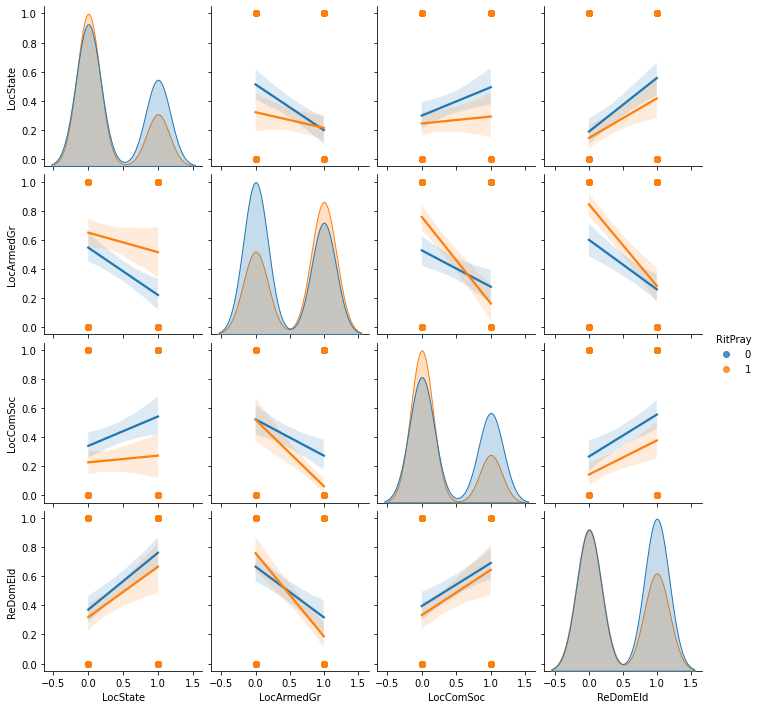

In [8]:
sns.pairplot(datafileR, vars=['LocState', 'LocArmedGr', 'LocComSoc',"ReDomEld"], kind='reg',hue='RitPray')
plt.savefig("pair.png")



> According to the distribution and linear regression represented in the graph (pair.png), different variables seem to have certain trends when comparing their linear regressions especially when I estimated them based on the variable, RitPray. I am wondering if the existence of ritual, religion, and prayer, including scripture and invocations of God in the country has positive effects on increasing the times of the nation being mentioned in its belong region in local peace agreement. Often when people have a certain belief, the community stays strong as they would support each other. Therefore, it might encourage the progress and nominations for forming a negotiation process if war is occurring in this country. In this case, the null hypothesis is that there are no correlations between the variable of RitPray and the variable Reg (regions). My alternative hypothesis would be that ritual/prayer (variable RitPray) has a positive impact on reflecting the higher number of nations in each region (Reg). I would test the statistic by calculating for sample data used to decide. For example, to have twenty countries evenly spread in each region that was mentioned in the local peace agreement. Have the average values on the number of RitPray a country has and to calculate by testing the statistic. The statistically significant is where we draw the line to make a decision. Normally we would say the level of confidence is 95% and the level of significance is 5%. In this case, if there are 19 countries in each region that have prayers, rituals and religions then I could prove that my alternative hypothesis is true. 

---


> The second alternative hypothesis I would like to make is whether the existence of rebel groups, self- defence groups and local terrorists (variable LocArmedGr) has an effect on the number of times for a country being mentioned in the local peace agreement (variable Con). The null hypothesis is whether the variable LocArmedGr with the number of times for a country being mentioned in the local peace agreement is irrelevant. In my experience, the more rebel groups in the local area would have more active protest activities to push the government onto a negotiation table so to reach certain goals for the organization. Often their initial intention is voicing for the people. For example, the Sunflower Student Movement was a student- organised movement that took place in Taiwan that perceived the trade pact with the People’s Republic of China would hurt Taiwan’s economy and leave it vulnerable to political pressure from Beijing, hence the protesters demanded the clause-by-clause review of the agreement by reinstates. In order to test and prove my alternative hypothesis, I would have to collect the average values from the LocArmedGr in 50 countries cross evenly through 5 regions, while the level of confidence is set at 90%. Therefore, if I failed to prove that there are more than 9 countries in each region where the average value of the LocArmedGr takes the majority percentage, then my alternative hypothesis is being rejected.

---



> The last alternative hypothesis worth investing in is whether the existence of representatives of local communities, professional groups such as pastoralists, agriculturalists, etc (variable LocComSoc) has an effect on the variable Con. The null hypothesis is that the relationship between the existence of these types of participants and the variable Con is irrelevant. My alternative hypothesis is that the variable LocComSoc exists in different countries, does not influence the figure of Con. From my personal experience, the local organizations tend to have limited positive outcomes that would prevent them from having their rights being taken away because their movement leans to be non-aggressive in Taiwan. For example, the status of United States beef imports has been an issue in Taiwan- United States relations. Controversy has centered on cases of bovine spongiform encephalopathy (commonly known as mad cow disease), and the use of ractopamine as an additive in feeds. The conflict has been called the “beef war” in the media; however, there has not yet any movement being held from the local meet- market organization (SwineROC); therefore there is no significant improvements and negotiations were being made to benefit the society and to the SwineROC regarding to meat- health issue. The entire trading situation is entirely under control by the government. To test my alternative hypothesis, I would have to collect the sum values of the variable LocComSoc from 50 random countries mentioned in the peace agreement, with the level of confidence set at 90%. The statistically significant is the average times we collect from the data for a nation being mentioned in the peace agreement states at 2 times. If the countries which have a high number of this type of participants being mentioned are more than statistically significant, and overseed more than 45 countries then the result for my alternative hypothesis is proved to be true. 








# The Exploration- Testing Different Hypothesis

# The First Hypothesis Testing

*   First Null Hypothesis (Ho): 
The relationship between the percentage of the RitPray variable with the variable Con is unknown.
*   My first Alternative Hypothesis (Ha): 
The percentage of the RitPray variable has a positive reflection on the variable Con.



To test (Ha), firstly, I summarised the number of variables Con during the entire period before analysing each column individually.



In [9]:
region = datafileR.groupby(["Reg"]) # print(region.get_group("Europe and Eurasia"))
year = datafileR.groupby(["Dat"])
print("The total number in counts for each region mentioned from 1990-2019 in the Local Peace Agreement:")
print("Middle East and North Africa: {}".format(datafileR["Reg"].value_counts().loc["Middle East and North Africa"]))
print("Africa (excl MENA): {}".format(datafileR["Reg"].value_counts().loc["Africa (excl MENA)"]))
print("Asia and Pacific: {}".format(datafileR["Reg"].value_counts().loc["Asia and Pacific"]))
print("Europe and Eurasia: {}".format(datafileR["Reg"].value_counts().loc["Europe and Eurasia"]))
print("Cross-regional: {}".format(datafileR["Reg"].value_counts().loc["Cross-regional"]))

The total number in counts for each region mentioned from 1990-2019 in the Local Peace Agreement:
Middle East and North Africa: 134
Africa (excl MENA): 116
Asia and Pacific: 23
Europe and Eurasia: 12
Cross-regional: 1


The percentages of variable RitPray in each region as following:

In [10]:
print("In Middle East and North Africa: {:.2%}".format((region["RitPray"].sum().loc["Middle East and North Africa"])/(datafileR["Reg"].value_counts().loc["Middle East and North Africa"])))
print("In Africa (excl MENA): {:.2%}".format((region["RitPray"].sum().loc["Africa (excl MENA)"])/(datafileR["Reg"].value_counts().loc["Africa (excl MENA)"])))
print("Asia and Pacific: {:.2%}".format((region["RitPray"].sum().loc["Asia and Pacific"])/(datafileR["Reg"].value_counts().loc["Asia and Pacific"])))
print("Europe and Eurasia: {:.2%}".format((region["RitPray"].sum().loc["Europe and Eurasia"]/(datafileR["Reg"].value_counts().loc["Europe and Eurasia"]))))
print("Cross-regional: {:.2%}".format((region["RitPray"].sum().loc["Cross-regional"]/(datafileR["Reg"].value_counts().loc["Cross-regional"]))))

In Middle East and North Africa: 79.10%
In Africa (excl MENA): 18.10%
Asia and Pacific: 8.70%
Europe and Eurasia: 0.00%
Cross-regional: 100.00%


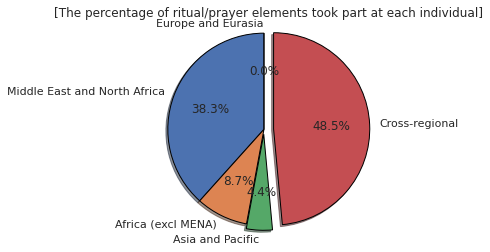

In [11]:
p1=round((region["RitPray"].sum().loc["Middle East and North Africa"])/(datafileR["Reg"].value_counts().loc["Middle East and North Africa"]),2)
p2=round((region["RitPray"].sum().loc["Africa (excl MENA)"])/(datafileR["Reg"].value_counts().loc["Africa (excl MENA)"]),2)
p3=round((region["RitPray"].sum().loc["Asia and Pacific"])/(datafileR["Reg"].value_counts().loc["Asia and Pacific"]),2)
p4=round((region["RitPray"].sum().loc["Europe and Eurasia"])/(datafileR["Reg"].value_counts().loc["Europe and Eurasia"]),2)
p5=round((region["RitPray"].sum().loc["Cross-regional"])/(datafileR["Reg"].value_counts().loc["Cross-regional"]),2)
sns.set_theme()
labels = "Middle East and North Africa", "Africa (excl MENA)","Asia and Pacific","Cross-regional", "Europe and Eurasia" 
sizes = [p1,p2,p3,p5,p4]
explode = (0, 0, 0.05, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops={"edgecolor":"black"})
ax1.axis('equal')  # Equal aspect ratio means that pie is shown as a circle.
plt.title("[The percentage of ritual/prayer elements took part at each individual]")
plt.savefig('The percentageRitPrey')  
plt.show()



>(The percentageRitPrey.png) The total number of nations in percentage on each region mentioned from 1990-2019 in the Local Peace Agreement. As the Cross- regional is considered as outlier, its part is not included in this pie chart.




As we see, there is only one case in region, Cross- regional; on the other hand, the conflicts took place mostly in the Middle East and North Africa and Africa (exl. MENA). Therefore, we consider region Cross- regional as an outlier in this dataset. However, I still put this region into account so that later on it has a place on world maps for our group project. Having said that, it is important to remember that this particular region played only a minor role in comparison to the rest of the areas in the world. 

Now, I am analysing the percentage of the RitPray variable that takes part at each individual region (The percentageRitPrey.png). According to this pie chart, there are no rituals/prayers existing in the Europe and Eurasia region; however, only one record reported for this region in its variable Con. On the other hand, the percentage of this ritual/prayer takes the 2nd highest place at the Cross- regional with 48.5%, then followed by the Middle East and North Africa with 38.3%, Africa (excl MENA) and Asia and Pacific with 8.7% and 4.4% respectively. If (Ha) is True, Cross- regional should have had the least number in negotiating for a peace agreement, followed by the Middle East and North Africa and so on. However, the states appear as the opposite. Therefore, the outcome of this test appears to fail to reject the Null Hypothesis (Ho).



In addition to this, I made further investigation into the distribution of values RitPray taken in the region Middle East and North Africa and in the country, Syria separately. Initially, Taking a closer look at the histogram graph (Distur_RitPray&MENA.png), the density of having RitPray in this region outnumbered those not having any prayer participants with four times greater. It indicates that there are considerable numbers of religions, and prayers, including scriptures (Quranic, from the Hadith, Biblical) and invocations of God in the Middle East and North Africa from 1990 to 2019.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


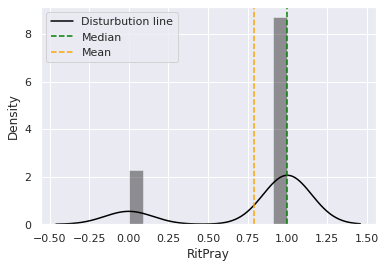

In [12]:
#DatMode = statistics.mode(datafileR["Dat"]) # 2018 
sns.set_theme()
mask_AP = datafileR[datafileR["Reg"]=="Middle East and North Africa"]
ax = sns.distplot(mask_AP["RitPray"],color="black")
plt.axvline(mask_AP["RitPray"].median(),0,1,color="green",linestyle='--')
plt.axvline(mask_AP["RitPray"].mean(),0,1,color="orange",linestyle='--')
plt.legend({"Disturbution line":ax,"Median":mask_AP["RitPray"].median(),"Mean":mask_AP["RitPray"].mean()})
plt.savefig("Distur_RitPray&MENA.png")



> (Distur_RitPray&MENA.png) The distribution of values ritual/prayer taken in the region Middle East and North Africa. Binary variable data type. Labeled as 0 symbols no such references are present in the agreement, and value of 1 symbols the agreement document contains any references to ritual, religion, and prayer, including scripture and invocations of God.


Next, I examined the distribution of RitPray in Syria which appears to have the most conflicts in the agreement with 75 times mentioned in the dataset. In the graph (Distur_RitPraySyria.png), the number of density with having religions and invocations of God plays quite significantly roles as 3 times more when compared to none in this country.  

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


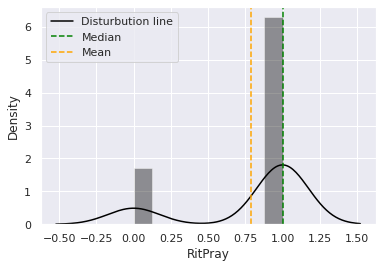

In [13]:
sns.set_theme()
mask_Syria = datafileR[datafileR["Con"]=="Syria"]
ax = sns.distplot(mask_Syria["RitPray"],color="black")
plt.axvline(mask_Syria["RitPray"].median(),0,1,color="green",linestyle='--')
plt.axvline(mask_Syria["RitPray"].mean(),0,1,color="orange",linestyle='--')
plt.legend({"Disturbution line":ax,"Median":mask_Syria["RitPray"].median(),"Mean":mask_AP["RitPray"].mean()})
plt.savefig("Distur_RitPraySyria.png")

> (Distur_RitPraySyria.png) The distribution of values ritual/prayer taken in the region Middle East and North Africa. Binary variable data type. Labeled as 0 symbols no such references are present in the agreement, and value of 1 symbols the agreement document contains any references to ritual, religion, and prayer, including scripture and invocations of God. 

In conclusion, the region where Syria belongs to has a considerable number of rituals/ prayer which can be represented as an example of the region in the Middle East and North Africa. I have plotted these two distributions of variable RitPrat in this region and country Syria together in fig.4 below for a generally visual analyzation. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


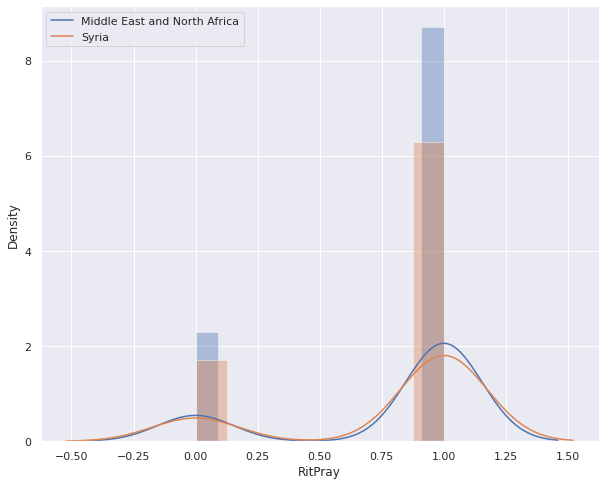

In [14]:
sns.set_theme()
fig,ax = plt.subplots(1,1,sharey=True,figsize=(10,8))
tb = sns.distplot(mask_AP["RitPray"], label='Middle East and North Africa',ax=ax)
tp = sns.distplot(mask_Syria["RitPray"], label='Syria',ax=ax)
# ax.legend(handles=[tb, tp])
ax.legend({"Middle East and North Africa":ax,"Syria":tb})
plt.savefig('Distribution_CountryRegion.png')  
plt.show()

>(Distribution_CountryRegion.png) The blue bar demonstrates the distribution of values ritual/prayer taken in the region Middle East and North Africa; while the orange bar illustrates Syria . Binary variable data type. Labeled as 0 symbols no such references are present in the agreement, and value of 1 symbols the agreement document contains any references to ritual, religion, and prayer, including scripture and invocations of God.



# The Second Hypothesis Testing

*   The 2nd Null Hypothesis (Ho): 
The relationship between the number of the variable RitPray and the LocState participant in each region is unknown.
*   My 2nd Alternative Hypothesis (Ha): 
It brings a positive outcome with a higher number of the variable RitPray, which will reflect on the LocState variable with greater values in each region.


> To test (Ha), I have put the variable RitPray values in comparison based on different regions (RitPray&LocState.png).



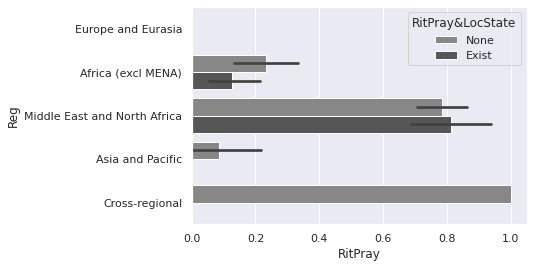

In [15]:
sns.set_theme()
labels=["None","Exist"]
x1 = sns.barplot(y=datafileR["Reg"], x=datafileR["RitPray"],hue=datafileR["LocState"],palette="Greys_d")
h, l = x1.get_legend_handles_labels()
x1.legend(h, labels, title="RitPray&LocState")
plt.savefig("RitPray&LocState.png")



> (RitPray&LocState.png) The light grey bars demonstrate the number of countries with no local state factor of the peace agreement reflecting on the density of ritual/prayer across each of the regions; while the dark-grey bars represents the existing  number of countries with no local state factor of the peace agreement reflecting on the density of ritual/prayer across each of the regions. Binary variable data type. When labeled as 0, symbols with no such references are presented in the agreement, and the value of 1 symbol in the agreement document contains any references to ritual, religion, and prayer, including scripture and invocations of God.


From this barchart (RitPray&LocState.png), in the Middle East and North Africa, the higher the number of countries with and without LocState participants, the more density of RitPray received. In more detail, there are a greater account of nations in LocState with the existence of LocState participants in this region which reached to just about 0.8 density; although for those countries which do not have such participants in variable LocState, its figure is just slightly below 0.8 density on RitPray. On the other hand, it is almost double the size for the countries without LocState participants than those nations which do exist in Africa (excl MENA). Even though both of the figures reflected on RitPray only fall between range 0.1 to 0.2 density. Nevertheless, region Europe and Eurasia is considered an outlier with no states (record) showing, as well as Asia and Pacific and Cross- regional both indicate that for those countries where LocState participants existed are counted as outliers by showing an empty blank in the values of LocState variable. However, the latter one has reached a density of 1.0. on RitPray for those LocState participants that did not exist in those nations. To summarise, in order to prove my alternative Hypothesis Ha is true, it should clearly indicate a positive outcome with a higher number of the variable RitPray, which will reflect on the LocState variable with greater values in each region. Therefore, the conclusion of this test appears to fail to reject the Null Hypothesis (Ho).

# The Third Hypothesis Testing


*   The 3rd Null Hypothesis (Ho): 
The relationship between the number of the variable RitPray with the local community/civilian group (s)/ civil society organisations (variable LocComSoc) of peace agreements in each region is unknown.
*   My 3rd Alternative Hypothesis (Ha): 
It brings a positive outcome with the greater number in the RitPray variable, and will reflect on the number of the variable LocComSoc participants of peace agreements in each region.

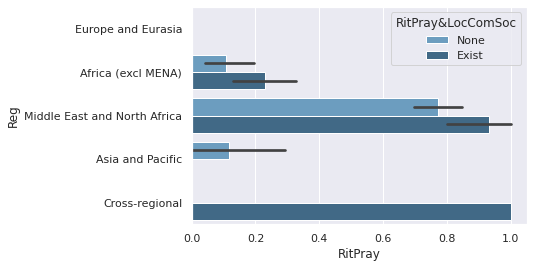

In [16]:
sns.set_theme()
labels=["None","Exist"]
x2 = sns.barplot(y=datafileR["Reg"], x=datafileR["RitPray"],hue=datafileR["LocComSoc"],palette="Blues_d")
h, l = x2.get_legend_handles_labels()
x2.legend(h, labels, title="RitPray&LocComSoc")
plt.savefig("RitPray&LocComSoc.png")



> (RitPray&LocComSoc.png) The light blue bars demonstrate the number of countries with no local community/civilian group (s)/ civil society organisations of the peace agreement reflecting on the density of ritual/prayer across each of the regions; while the dark-blue bars represents the existing number of countries with local community/civilian group (s)/ civil society organisations of the peace agreement reflecting on the density of ritual/prayer across each of  the regions. Binary variable data type. When labeled as 0, symbols with no such references are presented in the agreement, and the value of 1 symbol in the agreement document contains any references to local community/civilian group(s)/ civil society organisations.




In barchart (RitPray&LocComSoc.png), region Europe and Eurasia remained to be an outliner as there are no states being shown. There are more countries with the LocComSoc participants than those nations which did not, in both Africa (excl MENA) and Middle East and North Africa. However, the latter one appears to have four times greater density reflecting on the RitPray than that of the Africa (excl MENA) region. On the other hand, the countries in Cross- regional reached the highest density reflecting on RitPray for having the LocComSoc participants with a hundred percent. Nevertheless, the situation is reversed in the Asia and Pacific region as there are very few countries that do not have the LocComSoc participants and reflecting lower density on RitPray with density of 10%; while the figure for those countries had the LocComSoc participants is considered as an outlier case with no states shown. To summarise, if we excluded those outlier elements in this case, the outcome of this test appears to be true for approving my alternative Hypothesis (Ha).

# The Fourth Hypothesis Testing

*   The 4th Null Hypothesis (Ho): 
The relationship between the number of the variable RitPray with a country- based domestic religious organisation, its leader, or other elder of peace agreements (variable REDomEld) in each region is ambiguous.
*   My 4th Alternative Hypothesis (Ha): 
It brings a positive outcome with the higher density on the RitPray, reflecting on a higher number in the ReDomEld participants in each region.

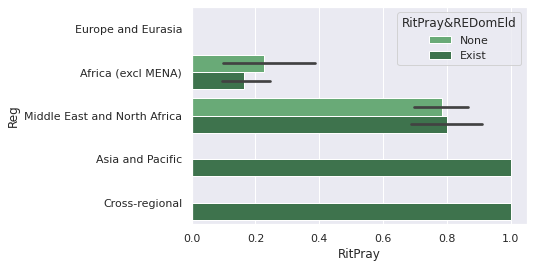

In [17]:
sns.set_theme()
labels=["None","Exist"]
x3 = sns.barplot(y=datafileR["Reg"], x=datafileR["RitPray"],hue=datafileR["ReDomEld"],palette="Greens_d")
h, l = x3.get_legend_handles_labels()
x3.legend(h, labels, title="RitPray&REDomEld")
plt.savefig("RitPray&REDomEld.png")



> (RitPray&REDomEld.png) The light green bars demonstrate the number of countries do not have a country- based domestic religious organisation, its leader, or other elders of the peace agreement reflecting on the density of ritual/prayer across each of  the regions; while the dark-green bars represents the existing number of countries have a country- based domestic religious organisation, its leader, or other elder of the peace agreement reflecting on the density of ritual/prayer across each of the regions. Binary variable data type. Labeled figure 0, symbols no such references are present in the agreement, and value of 1, symbols the agreement document contains any references to have a country- based domestic religious organisation, its leader, or other elders of the peace agreement.

In this barchart (RitPray&REDomEld.png), region Europe and Eurasia remained to be an outliner as there are no states being shown. There are more number of countries appears to not having a country- based domestic religious organisation, its leader, or other elder of peace agreements in Africa (excl MENA) with little more than 0.2 of density reflecting on RitPray. On the other hand, in the Middle East and North Africa there appears slightly more countries had the REDomEld participants than the ones not, both close to 0.8 figure in density on RitPray. Finally, there are a significant number of nations in both Asia and Pacific and Cross- regional, received high records in having the REDomEld participants, with the maximum density reflecting on RitPray variables. Although there are no signs of showing countries which do not have the ReDomEld participants in both of these two regions, it is counted as an outlier. To summarise, the conclusion of this test appears to fail to reject the Null Hypothesis (Ho).   

# The Fifth Hypothesis Testing



*   The 5th Null Hypothesis (Ho): 
The relationship between the number of the variable RitPray associates with the present of negotiation/ agreement participants is a formally or informally organised armed group of peace agreements (LocArmedGr) in each region is irrelevant.
*   My 5th Alternative Hypothesis (Ha): 
It comes with a positive outcome with the higher percentage on the RitPary, reflecting on a greater number of variables LocArmedGr in each region.



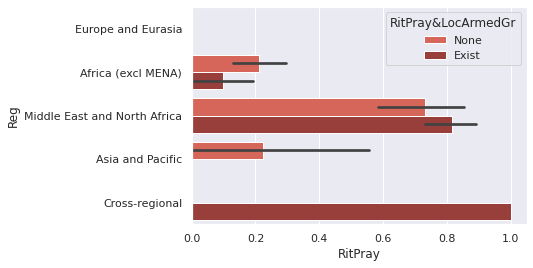

In [18]:
sns.set_theme()
labels=["None","Exist"]
x4 = sns.barplot(y=datafileR["Reg"], x=datafileR["RitPray"],hue=datafileR["LocArmedGr"],palette="Reds_d")
h, l = x4.get_legend_handles_labels()
x4.legend(h, labels, title="RitPray&LocArmedGr")
plt.savefig("RitPray&LocArmedGr.png")



> (RitPray&LocArmedGr.png) The light red bars demonstrate the number of countries do not have rebel groups, militia, self- defence group, extremists or any kind alike, reflecting on the density of ritual/prayer across each of the regions; while the dark-red bars represents the existing number of countries have rebel groups, militia, self- defence group, extremists or any kind alike, reflecting on the density of ritual/prayer across each of the regions. Binary variable data type. Labeled figure 0, symbols no such references are present in the agreement, and value of 1, symbols the agreement document contains any references to have a LocArmedGr participant.

In this barchart (RitPray&LocArmedGr.png), region Europe and Eurasia remained to be an outliner as there are no states being revealed. There are no states showing countries which did have the LocArmedGr participant in region Asia and Pacific thus will be examined as outliers; meanwhile the nations which had no such participant in Cross- regional revealed with no states, either. They are counted as outliers in this case. Nevertheless, in Asia and Pasific, nations did not have the LocArmedGr participant exceed slightly over 20% of density on the RitPray variable. On the other hand, for those nations with the LocArmedGr participants, appears to reach the maximum density on RitPray variables in Cross- regional region. On the other hand, there are a significant number of the countries with the existence of the LocArmedGr reflected on the RitPray density with around 0.8 figure than that of those countries which did not, with about 0.7 density in the Middle East and North Africa. In conclusion,  the outcome of this test appears to fail to reject the Null Hypothesis (Ho).




# Further Investigations 

With the curiosity of whether there is a pattern for those nations which had conflicts recorded in the peace agreement might spread in certain locations in the world, I tried to exime the dataset by visualising the states with applying a linear regression on the variable LatDec (latitude) and LongDec (longitude). As the result displayed in graph (implot.png), it is clear that most of the countries mentioned in the local peace agreement locates in between 0 to 30 longitude; while their location is centered below 40 latitude with some around 100 figures. However, there is one exception appeared on the top right corner with its latitude and longitude both set at 1000 which is considered as an outlier.

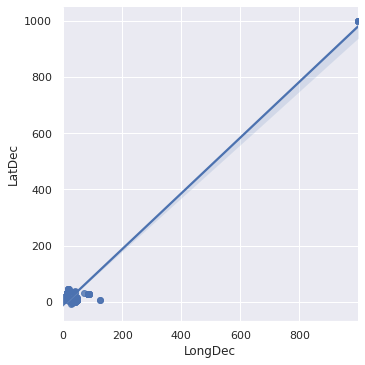

In [19]:
Location = sns.lmplot(y="LatDec", x="LongDec",data= datafileR)
plt.savefig("implot.png")



> The linear regression on the variable LatiDec (latitude) and LongDec (longitude) for nations being mentioned in the local peace agreement data set.



Furthermore, to have a thorough visualization on each countries that were mentioned in the local peace agreement in terms of their location determined by longitude and latitude, I set up two graphs individually based on the LongDec (cat_LongDec) and the LatDec variable (cat_LatDec.png) separately as following:  

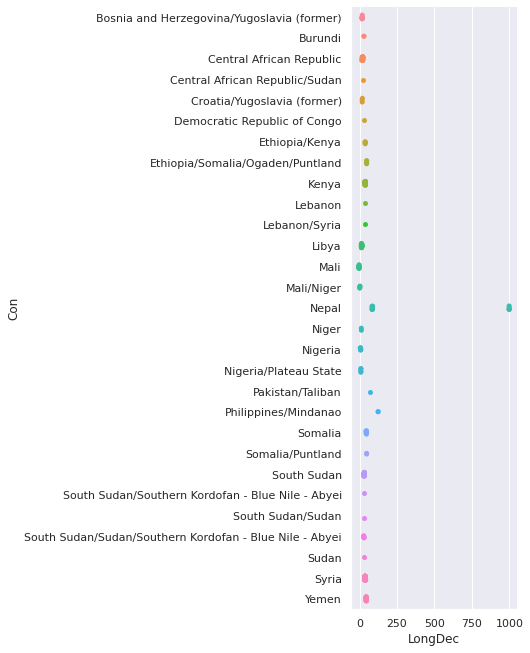

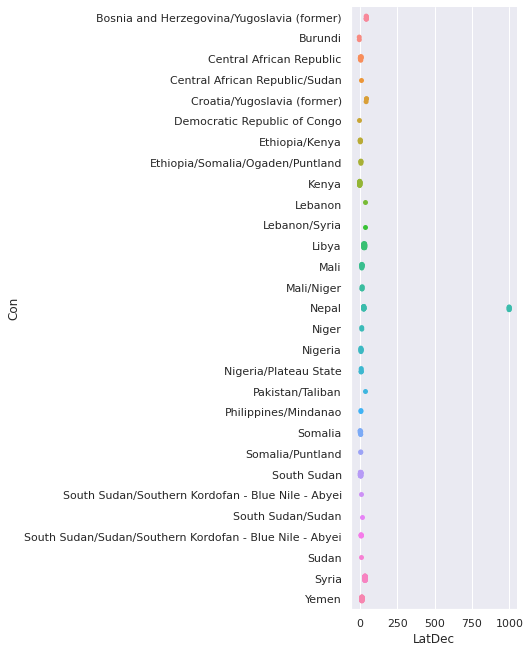

In [20]:
longdec = sns.catplot(y=datafileR["Con"], x="LongDec",data=datafileR,height=9, aspect=.8)
latdec = sns.catplot(y=datafileR["Con"], x="LatDec", data=datafileR,height=9, aspect=.8)
plt.savefig("cat_LongDec.png")
plt.savefig("cat_LatDec.png")

>*   cat_LongDec.png (Top) The visualization on the variable LongDec (latitude) for nations which were mentioned in the local peace agreement data set.  
>*   cat_LatDec.png (Bottom) The visualization on the variable LatDec (latitude) for nations which were mentioned in the local peace agreement data set. 







# Self- reflection

Working with this data set has gained me an understanding of how essential it is to pre- investigate the meaning behind every variable first before jumping into analysis of the data set. Understanding each variable (column) represents would give me a concept of interpreting the data correctly and grain me ideas of how to manipulate the data based on my needs. For example, I have wasted a tremendous amount of time trying to calculate the values of the variable PP (Peace Process Number) in which it turns out it's a series of code that requires the use of the peace process number conversion table on the PA-X website. In more detail, value 125 of PP does not represent the number of how many peace agreements are being processed, instead it is a code which was used for the data collector to organize the peace agreement. In addition, communication is also important between the project I am working on and the data provider. Often they are capable of offering accurate information about the data set and providing feasible suggestions to guide me through a direction that would save up time and energy for me from error shootings. Nevertheless, it is intriguing to investigate the relationships between variables in a data set, thinking about whether there is a pattern in a greater scale and making hypotheses based on my observation and life experiences. However, it is common that often there are no correlations between the variables even when I made an assumption based on my life experiences. Therefore, the best way to test a hypothesis is to provide with enough evidence from the data set, calculate the values and analyse the result. That way, we can make sure to deliver an unbiased report to further solve any type of problem we were signed to investigate. 

# References



*   PAX_Local_codebook
*   Vycl1994 Contributors. “Sunflower Student Movement.” Wikipedia, The Free Encyclopedia. Foundation, 17 Sept. 2020, [en.wikipedia.org/w/index.php?title=Sunflower_Student_Movement&oldid=978957581](https://)
*   Chongkian Contributors. “United States beef imports in Taiwan.” Wikipedia, The Free Encyclopedia. Foundation, 25 Augu. 2020, [en.wikipedia.org/w/index.php?title=United_States_beef_imports_in_Taiwan&oldid=974786107](https://)


